In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
def K(X, Xdot, l, P):
    return np.exp(-cdist(X,Xdot)**2/(2.0*l**2))*np.exp(-2*np.sin(np.pi*cdist(X,Xdot)/P)**2/(1.0*l**2))

In [3]:
test_inputs = np.loadtxt('test_inputs').reshape(-1,1)
train_inputs = np.loadtxt('train_inputs').reshape(-1,1)
train_outputs = np.loadtxt('train_outputs').reshape(-1,1)

In [4]:
def sample_prior(X,l,N,P):
    return np.random.multivariate_normal([0]*X.shape[0],K(X,X,l,P),N)
samples = sample_prior(test_inputs, l = 2, N = 5, P = 3)

In [5]:
def predictive_mean(X, y, Xdot, l, sigma, P):
    return K(Xdot,X,l,P)@np.linalg.solve(K(X,X,l,P)+sigma**2*np.eye(X.shape[0]),y)
def predictive_cov(X, y, Xdot, l, sigma, P):
    return K(Xdot,Xdot,l,P) - \
            K(Xdot,X,l,P)@np.linalg.solve(K(X,X,l,P)+
                                        sigma**2*\
                                        np.eye(X.shape[0]),
                                        K(X,Xdot,l,P)) 

In [6]:
mean = predictive_mean(train_inputs,train_outputs,test_inputs,2,1,3).reshape(-1)
cov = predictive_cov(train_inputs,train_outputs,test_inputs,2,1,3)
samples = np.random.multivariate_normal(mean, cov, 5)

Text(0, 0.5, 'y')

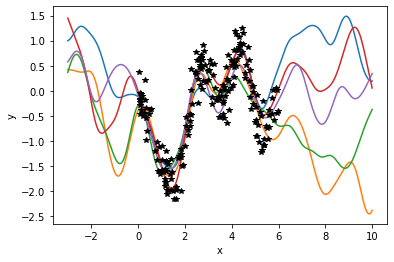

In [7]:
for i in range(5):
    plt.plot(test_inputs,samples[i,:])
plt.plot(train_inputs, train_outputs,'k*')
plt.xlabel("x")
plt.ylabel("y")

In [27]:
def K1(X, Xdot, c, d):
    return (np.dot(X,Xdot)+c)**d

In [28]:
test_inputs = np.loadtxt('test_inputs').reshape(-1,1)
train_inputs = np.loadtxt('train_inputs').reshape(-1,1)
train_outputs = np.loadtxt('train_outputs').reshape(-1,1)

In [29]:
def sample_prior(X,c,N,d):
    X2 = X.T
    return np.random.multivariate_normal([0]*X.shape[0],K1(X,X2,c,d),N)

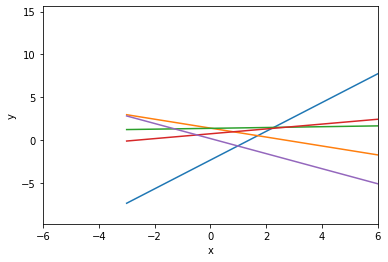

In [30]:
samples1 = sample_prior(test_inputs, c = 5, N = 5, d = 1)
for i in range(5):    
    plt.xlim(-6, 6)
    plt.plot(test_inputs,samples1[i,:])
    plt.xlabel("x")
    plt.ylabel("y")

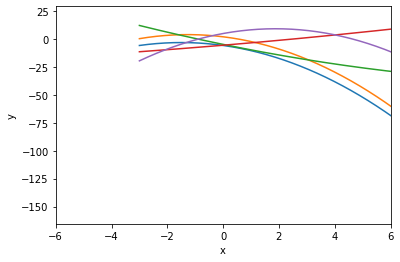

In [31]:
samples2 = sample_prior(test_inputs, c = 5, N = 5, d = 2)
for i in range(5):    
    plt.xlim(-6, 6)
    plt.plot(test_inputs,samples2[i,:])
    plt.xlabel("x")
    plt.ylabel("y")

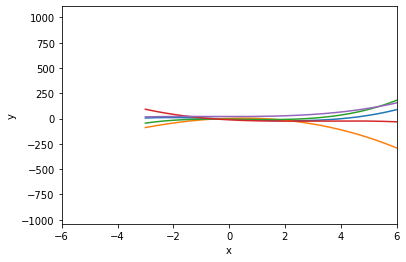

In [32]:
samples3 = sample_prior(test_inputs, c = 5, N = 5, d = 3)
for i in range(5):    
    plt.xlim(-6, 6)
    plt.plot(test_inputs,samples3[i,:])
    plt.xlabel("x")
    plt.ylabel("y")